# Create Candlestick Chart and Capture some common Price Patterns With S&P500
__IMPORTANT: This project is 100% done by Max Hong Ka Ho serving as academic study of the stock market and any results in this project should not be treated as investment advices for any individuals__

![Definition of CandleStick Chart](candlestick.jpg)

### The above picture shows the definition of a green candlestick and red candlestick in the stock market

### In this project, I would first try to convert the 10 years historical data of S&P 500 (from 2010 Jan 1 to 2020 Jan 1) into the above candlestick chart and then we try to capture some common candle stick patterns which are commonly used in technical analysis of stock trading and we would see how those patterns perform.

In [1]:
#import relevant library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the sp500 data
sp500 = pd.read_csv("SP500.csv").dropna()
#change the index col to datetime
sp500.index = pd.to_datetime(sp500.Date)
#take a look at the first few rows of sp500
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [3]:
from matplotlib.dates import date2num
from datetime import datetime
#convert our date to float
sp500['Date'] = [date2num(datetime.strptime(date, '%Y-%m-%d')) for date in sp500['Date']]
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,733776.0,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [4]:
#convert the dataframe to list with date open high low close 
sp500_listdata = []
for i in range(len(sp500)):
    a = [sp500['Date'][i],
         sp500['Open'][i],
         sp500['High'][i],
         sp500['Low'][i],
         sp500['Close'][i]]
    sp500_listdata.append(a)

In [5]:
#import relevant library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, DateLocator, MONDAY, DayLocator
from mpl_finance import candlestick_ohlc

C:\Users\Hp User\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [6]:
#lets extract the 2015 Jan to Mar sp500 data
sp50015 = sp500['2015-01':'2015-03']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

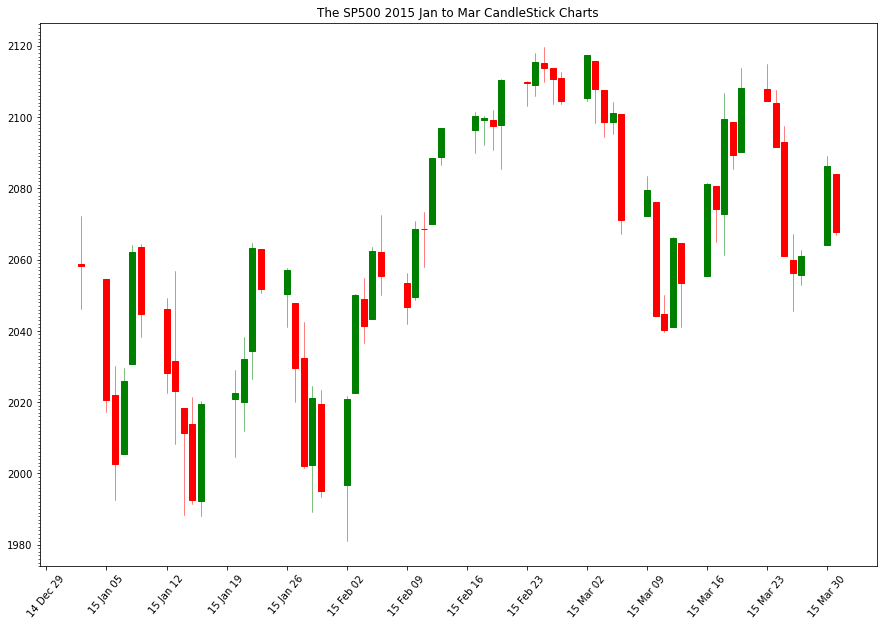

In [7]:
plt.figure(figsize = (15, 10))
ax = plt.subplot()
#set the date displaying location
mondays = WeekdayLocator(MONDAY)
ax.xaxis.set_major_locator(mondays)
ax.yaxis.set_minor_locator(DayLocator())
#set the format
weekformatter = DateFormatter("%y %b %d")
ax.xaxis.set_major_formatter(weekformatter)
#set the graph title
ax.set_title("The SP500 2015 Jan to Mar CandleStick Charts")
#plot the candlesticks
candlestick_ohlc(ax, np.array(sp50015), width = 0.7, colorup='g', colordown='r')
#set the rotation angle of the x axis date
plt.setp(plt.gca().get_xticklabels(), rotation = 50, horizontalalignment = 'center')

### Up to this stage, we have finished our first task to convert the numbers into the accustomed graph of many investors- candlestick charts

## Library for Later Use

```Python
#make a library to plot the candle sticks for dataframe
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, DateLocator, MONDAY, DayLocator
from mpl_finance import candlestick_ohlc
def candleplot(seriesdata, title = 'a'):
    #set the date format
    Date = [date2num(date) for date in seriesdata.index]
    seriesdata.loc[:,'Date'] = Date
    
    #convert the df to list
    listData = []
    for i in range(len(seriesdata)):
        a = [seriesdata['Date'][i],
        seriesdata['Open'][i], seriesdata['High'][i],
        seriesdata['Low'][i], seriesdata['Close'][i]]
        listData.append(a)
    
    #set up the parameters fir the plot
    plt.figure(figsize=(12, 6))
    ax = plt.subplot()
    mondays = WeekdayLocator(MONDAY)
    ax.xaxis.set_major_locator(mondays)
    ax.yaxis.set_minor_locator(DayLocator())
    #set the format
    weekformatter = DateFormatter("%y %b %d")
    ax.xaxis.set_major_formatter(weekformatter)
    
    #call the candlestick_ohlc function
    candlestick_ohlc(ax, np.listData, width = 0.7, colorup='g', colordown='r')
    #set title
    ax.set_title(title)
    #set the rotation angle of the date
    plt.setp(plt.gca().get_xticklabels(), rotation = 50, horizontalalignment = 'center')
    return plt.show()
```

# Doji

### In this section, we would try to capture one of the most famous price patterns - Doji
### Implication of Doji: Doji is a reversal pattern in technical analysis. When the stock is in uptrend, those traders will believe that the stock will move in revere trend(ie. moving downwards). This applies to the downtrend in the same way
### Definition of Doji: The candle stick should have very thin candle body, that means that the open price and close price are very close to each other. In this experiment, I have set my definition to be within 3 index points

![Definition of Doji](doji.png)

### The above graph shows the visualization of the doji

In [8]:
Open = sp500.Open
Close = sp500.Close
Doji = []
for i in range(len(Open)):
    if abs(Open[i] - Close[i]) <= 3:
        Doji.append(1)
    else:
        Doji.append(0)
#number of Doji pattern in the sp500
Doji.count(1)

629

In [9]:
#let's take a look at the Doji
Doji = np.array(Doji)
Doji[Doji == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
#let's create a copy in sp500
sp500_copy = sp500

In [11]:
# We add the Doji to the sp500 DataFrame
sp500_copy['Doji'] = Doji

In [12]:
#see if we have successfully add to the dataframe
sp500_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji
Date,,,,,,,,
2010-01-04,733776.0,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,1
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0


## Trend of the Market:
### We have to figure out the current trend in the market in order to implement our plan in the sp500

### We would use the 2 previous candlesticks for reference. If all closing price are surging comparing with yesterday's candlestick, we would assert that the market is in short term upward trend and short-sell the sp500 when the doji appears

In [13]:
trend = [0, 0]
for i in range(3, len(Close) + 1):
    if Close[i - 1] > Close[i - 2]:
        trend.append(1) #1 indicates uptrend
    else:
        trend.append(-1) #-1 indicated downtrend
#look at the first 5 elements trend series
trend[:5]

[0, 0, 1, 1, 1]

In [14]:
#add the trend to the dataframe
sp500_copy['Trend'] = np.array(trend)

In [15]:
#see if it has sucessfully added
sp500_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend
Date,,,,,,,,,
2010-01-04,733776.0,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0,0
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,1,1
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,1
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,1


### We would combine the Doji and Trend for the Signal: When Doji = 1 and Trend = 1, then we would set the signal to -1(short-sell). When Doji = 1 and Trend = -1, then we would set signal = 1(long the sp500). All those trades will be executed for 5 days in this experiement to capture the short term trend
### Remarks: if the next doji appears within the 5 days execution time of previous doji, then we would follow the signal of the new doji and ignore the last one

In [16]:
signal = []
for i in range(len(Close)):
    if all([sp500_copy['Doji'][i] == 1 and sp500_copy['Trend'][i] == 1]):
        signal.append(-1)
    elif all([Doji[i] == 1 and trend == -1]):
        signal.append(1)
    else:
        signal.append(0)
signal.count(-1)

318

In [17]:
#add the signal to the DF
sp500_copy['Signal'] = np.array(signal)

In [18]:
sp500_copy['Signal'][sp500_copy['Signal'] == -1]

Date
2010-01-06   -1
2010-01-11   -1
2010-01-14   -1
2010-02-05   -1
2010-02-26   -1
             ..
2019-12-05   -1
2019-12-13   -1
2019-12-17   -1
2019-12-20   -1
2019-12-23   -1
Name: Signal, Length: 318, dtype: int32

In [19]:
sp500_copy['Signal'][sp500_copy['Signal'] == 1]

Series([], Name: Signal, dtype: int32)

### We can see that there are 318 case for us to short sell the market since there are upward trend + Doji. However, there are not any downward trend + Doji which makes there are no cases for us to long the market

In [20]:
sp500_copy

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,Signal
Date,,,,,,,,,,
2010-01-04,733776.0,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0,0,0
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0,0
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,1,1,-1
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,1,0
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,737417.0,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000,1,-1,0
2019-12-26,737419.0,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000,0,1,0
2019-12-27,737420.0,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000,0,1,0


In [21]:
for i in range(len(sp500_copy['Signal'])):
    if sp500_copy['Signal'][i] == -1:
        sp500_copy['Signal'][i + 1: i + 6] = -1
sp500_copy.head()

C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,Signal
Date,,,,,,,,,,
2010-01-04,733776.0,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0,0,0
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0,0
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,1,1,-1
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,1,-1
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,1,-1


## Test of Doji in the SP500

#### Library for future use

In [74]:
def trade(df, ret_series, signal):
    df['Trade_Return'] = ret_series * signal
    df = df.dropna()
    return df

def Sharpe_Ratio(ret_series, rf):
    mean = (1 + ret_series).prod()**(1 / len(ret_series[ret_series != 0])) - 1
    std = np.std(ret_series) * len(ret_series) / len(ret_series[ret_series != 0])
    return (mean - rf) / std
    
def backtest(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """ #documetation string
    wealth_index = 10000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown" : drawdowns
    })

In [62]:
#Create the column that records the return of SP500 if we just buy and hold the  SP500
sp500_copy['Return'] = Close / Close.shift(1) - 1
sp500_copy = sp500_copy.dropna()
sp500_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,Signal,Return,Trade_Return
Date,,,,,,,,,,,,
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0,0,0.003116,0.000000
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,1,1,-1,0.000546,-0.000546
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,1,-1,0.004001,-0.004001
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,1,-1,0.002882,-0.002882
2010-01-11,733783.0,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,1,1,-1,0.001747,-0.001747


In [63]:
#Create the column that records the return of SP500 if we trade the SP500 with Doji Strategy
sp500_copy = trade(sp500_copy, sp500_copy['Return'], sp500_copy['Signal'])
sp500_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,Signal,Return,Trade_Return
Date,,,,,,,,,,,,
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0,0,0.003116,0.000000
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,1,1,-1,0.000546,-0.000546
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,1,-1,0.004001,-0.004001
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,1,-1,0.002882,-0.002882
2010-01-11,733783.0,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,1,1,-1,0.001747,-0.001747


In [64]:
#create the wealth index function
backtest_result = backtest(sp500_copy['Trade_Return'])
backtest_result.head()

,Wealth,Peaks,Drawdown
Date,,,
2010-01-05,10000.000000,10000.0,0.000000
2010-01-06,9994.544795,10000.0,-0.000546
2010-01-07,9954.554610,10000.0,-0.004545
2010-01-08,9925.868299,10000.0,-0.007413
2010-01-11,9908.530235,10000.0,-0.009147


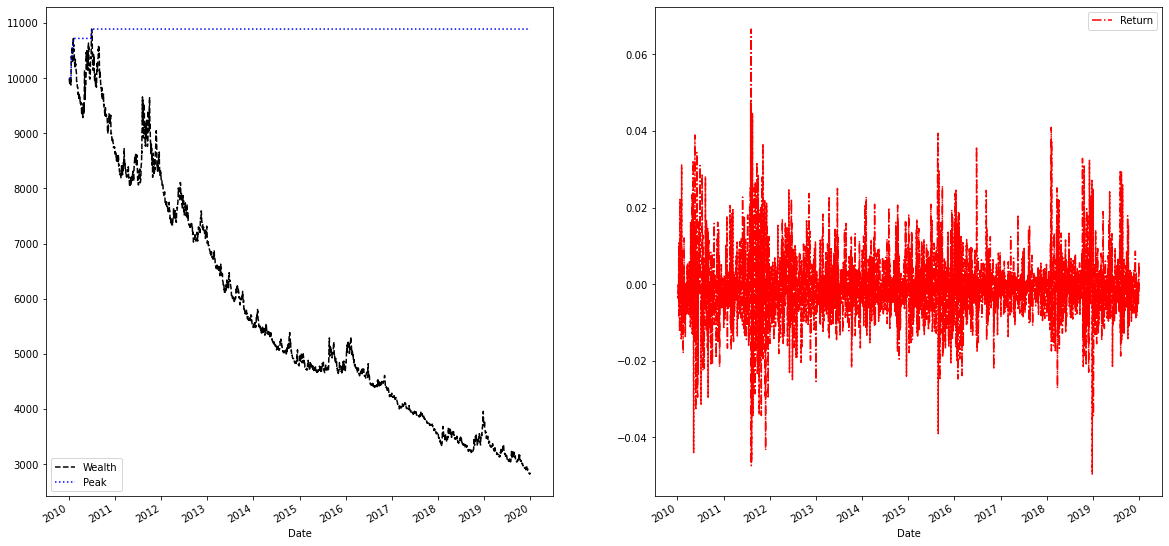

In [65]:
# Lets plot the trade return and Wealth
plt.subplot(121)
backtest_result['Wealth'].plot(figsize = (20, 10), linestyle = '--', color = 'k', label = 'Wealth')
backtest_result['Peaks'].plot(linestyle = ':', color = 'b', label = 'Peak')
plt.legend()
plt.subplot(122)
sp500_copy['Trade_Return'].plot(linestyle = '-.', color = 'r', label = 'Return')
plt.legend()


### With initial wealth = 10000USD, the final wealth of the Doji Trading Strategy make our wallet decreases to 2828.485510USD and we have lost 7171.51449USD(71.7% of our money)

In [77]:
#sharpe ratio, assume the riskfree rate is 0%
sharpe_ratio = Sharpe_Ratio(sp500_copy['Trade_Return'], 0.0)
sharpe_ratio

-0.053982101826868543

## Another Example: Morning Star

### What is Morning Star: 


### Morning Star is usually occurred in the downward trend and its occurrance usually implies that the downward trend is over and the upward trend is expecting in the near future. In short, it is a bullish reversal pattern which indicates the expectation of short-term bullish pattern in the near future\

### Candle body = the filled color candle part between the open price and close price 

### Definition of Morning Star:


### 1. The first candle should be a bearish candle(red) : the close price of that day < open price of that day (we set it to be at least 5 index points difference)


### 2. The second candle should be a Doji as defined above, but the Doji should be located below the the candle bodies of candle 1 and 3


### 3 The third candle is a bullish candle(green)  : the close price of that day > open price of that day and the candle body should be at least half as large as the first candle

<img src="MorningStar.jpg" width="400">

### The above image shows the visualization of the Morning Star

In [67]:
#define the difference between the close and open (close - open)
clop = Close - Open
#capture the green , red, and doji
shape = [0, 0, 0]
for i in range(3, len(Close)):
    if all([clop[i - 2] < -5, abs(clop[i - 1]) < 2, clop[i] > 2, abs(clop[i]) > abs(clop[i - 2]) * 0.5]):
        shape.append(1)
    else:
        shape.append(0)

In [68]:
#get the number of Morning Star in 10 years
shape.count(1), len(shape)

(24, 2516)

In [69]:
#capture the Doji position that satisfy the above criterion
Doji_1 = [0, 0, 0]
for i in range(3, len(Close)):
    if all([Open[i - 1] < Open[i], Open[i - 1] < Close[i - 2], Close[i - 1] < Open[i], Close[i - 1] < Close[i - 2]]):
        Doji_1.append(1)
    else:
        Doji_1.append(0)
Doji_1.count(1), len(Doji_1)

(124, 2516)

In [70]:
#define the downward trend
trend1 = [0, 0, 0]
for i in range(3, len(Close)):
    if Close[i - 2] < Close[i - 3]:
        trend1.append(1)
    else:
        trend1.append(0)
len(trend1)

2516

In [71]:
#Create the copy of sp500
sp500_copy1 = sp500
sp500_copy1['GDR'] = np.array(shape)
sp500_copy1['Doji'] = np.array(Doji_1)
sp500_copy1['Trend'] = np.array(trend1)


In [72]:
#capture the Morning Star
StarSig = []
for i in range(len(Close)):
    if all([shape[i] == 1, Doji_1[i] == 1, trend1[i] == 1]):
        StarSig.append(1)
    else:
        StarSig.append(0)


In [34]:
#Check if the length equals to the df
len(StarSig)

2516

In [35]:
#number of StarSig in 10 years
StarSig = np.array(StarSig)
StarSig[StarSig == 1].sum()

3

In [36]:
#append it to the dataframe
sp500_copy1['StarSig'] = StarSig

In [37]:
#check if successfully added
sp500_copy1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,Signal,Return,GDR,StarSig
Date,,,,,,,,,,,,,
2010-01-04,733776.0,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0,0,0,NaN,0,0
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0,0,0.003116,0,0
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0,0,-1,0.000546,0,0
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,0,-1,0.004001,0,0
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,0,-1,0.002882,0,0


# Trade With Morning Star

In [38]:
#delect some irrelevant columns
del sp500_copy1['Signal']
del sp500_copy1['Return']

In [39]:
# We would long the SP500 for 5 days after the occurance of the Morning Star
for i in range(len(Close)):
    if sp500_copy1['StarSig'][i] == 1 and sp500_copy1['StarSig'][i - 1] == 0:
        sp500_copy1['StarSig'][i + 1: i + 6] = 1
        

C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
#Create the column that records the return of SP500 if we just buy and hold the  SP500
sp500_copy1['Return'] = Close / Close.shift(1) - 1
sp500_copy1 = sp500_copy1.dropna()
sp500_copy1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,GDR,StarSig,Return
Date,,,,,,,,,,,,
2010-01-05,733777.0,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0,0,0,0,0.003116
2010-01-06,733778.0,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0,0,0,0,0.000546
2010-01-07,733779.0,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0,0,0,0,0.004001
2010-01-08,733780.0,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0,0,0,0,0.002882
2010-01-11,733783.0,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0,0,0,0,0.001747


In [50]:
# define the trade
tradems = trade(sp500_copy1, sp500_copy1['Return'], sp500_copy1['StarSig'])
tradems.tail()

C:\Users\Hp User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Adj Close,Volume,Doji,Trend,GDR,StarSig,Return,Trade_Return
Date,,,,,,,,,,,,,
2019-12-24,737417.0,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000,0,0,0,0,-0.000195,-0.0
2019-12-26,737419.0,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000,0,0,0,0,0.005128,0.0
2019-12-27,737420.0,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000,0,1,0,0,0.000034,0.0
2019-12-30,737423.0,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3013290000,0,0,0,0,-0.005781,-0.0
2019-12-31,737424.0,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2893810000,0,0,0,0,0.002946,0.0


In [42]:
backtest_result1 = backtest(sp500_copy1['Trade_Return'])

In [43]:
backtest_result1.tail()

,Wealth,Peaks,Drawdown
Date,,,
2019-12-24,10577.659586,10593.690928,-0.001513
2019-12-26,10577.659586,10593.690928,-0.001513
2019-12-27,10577.659586,10593.690928,-0.001513
2019-12-30,10577.659586,10593.690928,-0.001513
2019-12-31,10577.659586,10593.690928,-0.001513


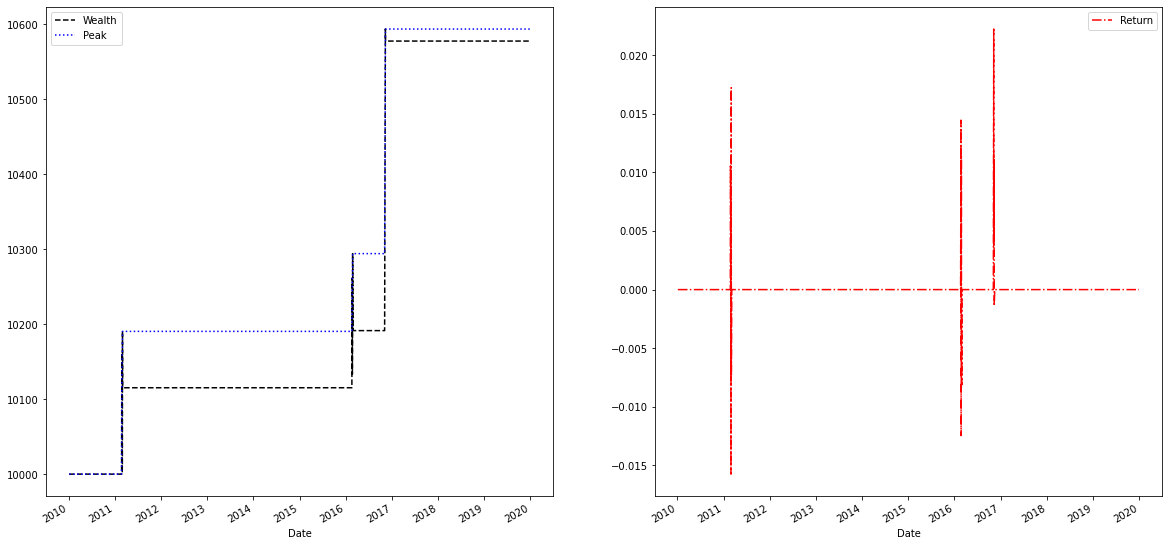

In [52]:
#plot the backtest result
plt.subplot(121)
backtest_result1['Wealth'].plot(figsize = (20, 10), linestyle = '--', color = 'k', label = 'Wealth')
backtest_result1['Peaks'].plot(linestyle = ':', color = 'b', label = 'Peak')
plt.legend()
plt.subplot(122)
tradems['Trade_Return'].plot(linestyle = '-.', color = 'r', label = 'Return')
plt.legend()

In [78]:
sharpe_ratio1 = Sharpe_Ratio(tradems['Trade_Return'], 0.0)
sharpe_ratio1

0.025328773036752843

### We finally make 10600USD with 3 trades on the Morning Star Patterns in 10 years time and there are 6% profit in total for the 3 trades

# Summary of The Two Price Patterns

In [100]:
summary = pd.DataFrame({'Index': ['Number of Occurance', 'Return', 'Max DrawDown', 'Sharpe Ratio'],
                        'Doji Trading': [318, (backtest_result['Wealth'][-1] - backtest_result['Wealth'][0]) / backtest_result['Wealth'][0], backtest_result['Drawdown'].min(), sharpe_ratio],
                        'Morning Star Trading': [3, (backtest_result1['Wealth'][-1] - backtest_result1['Wealth'][0]) / backtest_result1['Wealth'][0], backtest_result1['Drawdown'].min(), sharpe_ratio]})

In [101]:
summary

,Index,Doji Trading,Morning Star Trading
0,Number of Occurance,318.000000,3.000000
1,Return,-0.717151,0.057766
2,Max DrawDown,-0.741028,-0.015740
3,Sharpe Ratio,-0.053982,-0.053982


# Conclusion

## We see that trading with price pattern is not a good idea at all especially trading with Doji, there will be 74% max drawdown in the 10 years of trading and it reveals that it may not be a strong indicator for "Reversal Pattern" with negative sharpe ratio.

## Instead, Morning Star is a much better reversal pattern and there 6 % gain to just trade with Morning Star in 10 years. The only drawback is that the Morning Star opportunity is really really small with only 3 times occurances in 10 years!!!! which is totally not enough to earn profit consistently.

## The reader can reproduce other patterns of price with my suggestted method above and see if they work on your own stocks /  markets